n_estimators   --- The model calculates the average path length across all
trees to determine if a point is anomalous.


--- n_estimators = 5 ---
Accuracy: 0.684

--- n_estimators = 20 ---
Accuracy: 0.649

--- n_estimators = 50 ---
Accuracy: 0.637

--- n_estimators = 100 ---
Accuracy: 0.649


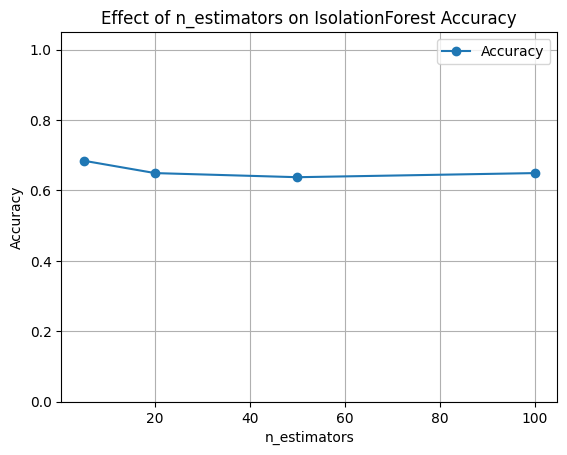

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert y_test for anomaly detection: benign (1) = normal (1), malignant (0) = anomaly (-1)
y_test_binary = np.where(y_test == 1, 1, -1)

n_values = [5, 20, 50, 100]
accuracies = []

for n in n_values:
    print(f"\n--- n_estimators = {n} ---")
    model = IsolationForest(n_estimators=n, contamination='auto', random_state=42)
    model.fit(X_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    accuracies.append(accuracy)

plt.plot(n_values, accuracies, marker='o', label='Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on IsolationForest Accuracy')
plt.grid(True)
plt.ylim(0.0, 1.05)
plt.legend()
plt.show()


Insight:
**Increasing the number of estimators in Isolation Forest beyond 20 does not significantly improve accuracy and shows a slight performance dip at 50.**

max_samples  --- sampling

--- max_samples = 0.3 ---
Accuracy: 0.690

--- max_samples = 0.5 ---
Accuracy: 0.655

--- max_samples = 0.7 ---
Accuracy: 0.684

--- max_samples = 1.0 ---
Accuracy: 0.678



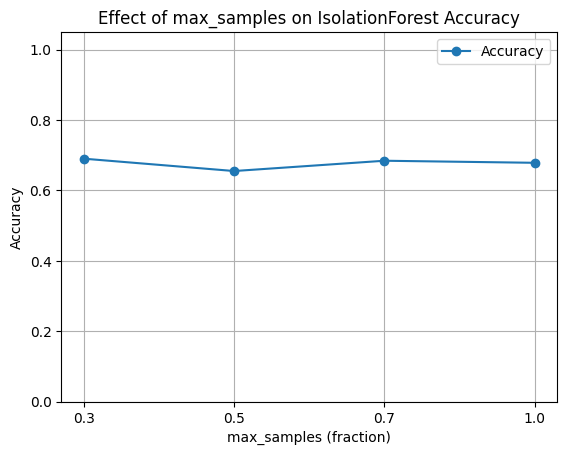

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_binary = np.where(y_test == 1, 1, -1)

sample_values = [0.3, 0.5, 0.7, 1.0]
labels = ['0.3', '0.5', '0.7', '1.0']
accuracies = []

for val, label in zip(sample_values, labels):
    model = IsolationForest(n_estimators=50, max_samples=val, contamination='auto', random_state=42)
    model.fit(X_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"--- max_samples = {label} ---")
    print(f"Accuracy: {accuracy:.3f}\n")

    accuracies.append(accuracy)


plt.plot(labels, accuracies, marker='o', label='Accuracy')
plt.title('Effect of max_samples on IsolationForest Accuracy')
plt.xlabel('max_samples (fraction)')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.legend()
plt.show()


**Isolation Forest achieves the highest accuracy when max_samples is set to 0.3, with performance slightly decreasing as the sample size increases.**

contamination

--- contamination = 0.01 ---
Accuracy: 0.637

--- contamination = 0.05 ---
Accuracy: 0.667

--- contamination = 0.1 ---
Accuracy: 0.655

--- contamination = 0.2 ---
Accuracy: 0.684



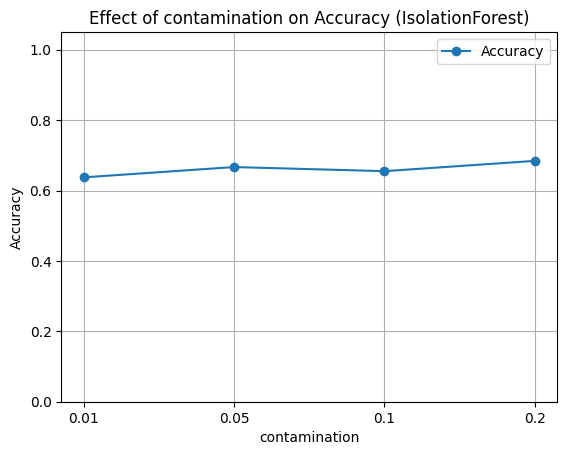

In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = load_breast_cancer(return_X_y=True)  # y=1 (benign), y=0 (malignant)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We'll consider benign (y=1) as normal → 1, malignant (y=0) as anomaly → -1
y_test_binary = np.where(y_test == 1, 1, -1)

# different contamination values
contamination_values = [0.01, 0.05, 0.1, 0.2]
labels = ['0.01', '0.05', '0.1', '0.2']
accuracies = []

for c, label in zip(contamination_values, labels):
    model = IsolationForest(contamination=c, random_state=42)
    model.fit(X_train)
    preds = model.predict(X_test)

    accuracy = accuracy_score(y_test_binary, preds)
    print(f"--- contamination = {label} ---")
    print(f"Accuracy: {accuracy:.3f}\n")

    accuracies.append(accuracy)

# Plot
plt.plot(labels, accuracies, marker='o', label='Accuracy')
plt.title('Effect of contamination on Accuracy (IsolationForest)')
plt.xlabel('contamination')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.legend()
plt.show()


**Isolation Forest yields the highest accuracy at contamination level 0.2, indicating better performance when assuming more outliers.**

max feature

--- max_features = 0.3 ---
Accuracy: 0.690

--- max_features = 0.5 ---
Accuracy: 0.655

--- max_features = 0.7 ---
Accuracy: 0.678

--- max_features = 1.0 ---
Accuracy: 0.637



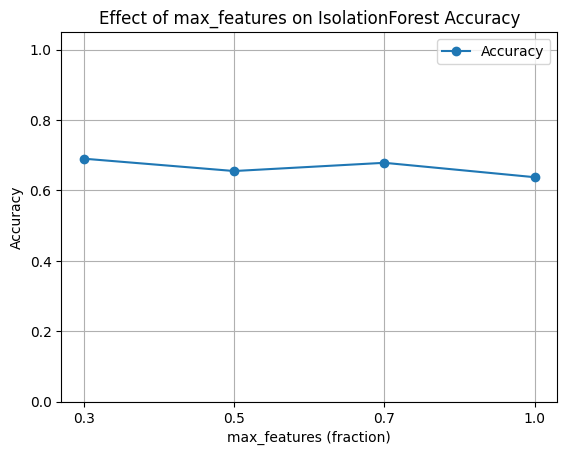

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert labels: benign (1) = normal (1), malignant (0) = anomaly (-1)
y_test_binary = np.where(y_test == 1, 1, -1)

feature_options = [0.3, 0.5, 0.7, 1.0]
labels = ['0.3', '0.5', '0.7', '1.0']
accuracies = []

for f, label in zip(feature_options, labels):
    model = IsolationForest(n_estimators=50, max_features=f, contamination='auto', random_state=42)
    model.fit(X_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test_binary, y_pred)
    print(f"--- max_features = {label} ---")
    print(f"Accuracy: {accuracy:.3f}\n")

    accuracies.append(accuracy)

plt.plot(labels, accuracies, marker='o', label='Accuracy')
plt.title('Effect of max_features on IsolationForest Accuracy')
plt.xlabel('max_features (fraction)')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.legend()
plt.show()


**Isolation Forest achieves peak accuracy when max_features is set to 0.7, with performance dropping at both lower and full feature usage.**

bootstrap --- bool, default=False
bootstrap: If True, trees use data with replacement (some rows can repeat); if False (default),
each row is used only once per tree.

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_if = np.where(y_test == 1, -1, 1)

# Isolation Forest with bootstrap
clf_bootstrap = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
clf_bootstrap.fit(X_train)
y_pred_bootstrap = clf_bootstrap.predict(X_test)
accuracy_bootstrap = np.mean(y_pred_bootstrap == y_test_if)

# Isolation Forest without bootstrap
clf_no_bootstrap = IsolationForest(n_estimators=100, bootstrap=False, random_state=42)
clf_no_bootstrap.fit(X_train)
y_pred_no_bootstrap = clf_no_bootstrap.predict(X_test)
accuracy_no_bootstrap = np.mean(y_pred_no_bootstrap == y_test_if)

print("With bootstrap accuracy:", accuracy_bootstrap)
print("Without bootstrap accuracy:", accuracy_no_bootstrap)


With bootstrap accuracy: 0.30994152046783624
Without bootstrap accuracy: 0.3508771929824561


n_jobs

In [55]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import time

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_if = np.where(y_test == 1, -1, 1)

# All cores
start = time.time()
clf_parallel = IsolationForest(n_estimators=100, n_jobs=-1, random_state=42)
clf_parallel.fit(X_train)
y_pred_parallel = clf_parallel.predict(X_test)
print("Accuracy (n_jobs=-1)all cores:", accuracy_score(y_test_if, y_pred_parallel))

# Single core
start = time.time()
clf_single = IsolationForest(n_estimators=100, n_jobs=1, random_state=42)
clf_single.fit(X_train)
y_pred_single = clf_single.predict(X_test)
print("Accuracy (n_jobs=1) single core:", accuracy_score(y_test_if, y_pred_single))


Accuracy (n_jobs=-1)all cores: 0.3508771929824561
Accuracy (n_jobs=1) single core: 0.3508771929824561


random state

In [48]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_if = np.where(y_test == 1, -1, 1)

# Model 1
clf1 = IsolationForest(n_estimators=50)
clf1.fit(X_train)
pred1 = clf1.predict(X_test)

# Model 2
clf2 = IsolationForest(n_estimators=50)
clf2.fit(X_train)
pred2 = clf2.predict(X_test)

print("Accuracy (model 1):", accuracy_score(y_test_if, pred1))
print("Accuracy (model 2):", accuracy_score(y_test_if, pred2))
print("Predictions match?", (pred1 == pred2).all())


Accuracy (model 1): 0.30409356725146197
Accuracy (model 2): 0.2807017543859649
Predictions match? False


verbose

In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Isolation Forest without verbose output
iso = IsolationForest(n_estimators=100, verbose=0, random_state=42, n_jobs=-1)
iso.fit(X_train)


IsolationForest(n_jobs=-1, random_state=42)

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Isolation Forest with verbose output
iso = IsolationForest(n_estimators=100, verbose=1, random_state=42, n_jobs=-1)
iso.fit(X_train)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished


IsolationForest(n_jobs=-1, random_state=42, verbose=1)

warm start  =====  **If warm_start=True, calling .fit() again adds more trees to the existing ensemble instead of starting fresh.**

In [37]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, _ = load_breast_cancer(return_X_y=True)

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# First fit with 50 estimators
iso = IsolationForest(n_estimators=50, warm_start=True, random_state=42, verbose=1)
iso.fit(X_train)

# Now increase to 100 estimators (adds 50 more)
iso.n_estimators = 100
iso.fit(X_train)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


IsolationForest(random_state=42, verbose=1, warm_start=True)

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, _ = load_breast_cancer(return_X_y=True)

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# First fit with 50 estimators
iso = IsolationForest(n_estimators=50, warm_start=False, random_state=42, verbose=1)
iso.fit(X_train)

# Now increase to 100 estimators (adds 50 more)
iso.n_estimators = 100
iso.fit(X_train)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


IsolationForest(random_state=42, verbose=1)

Important feature

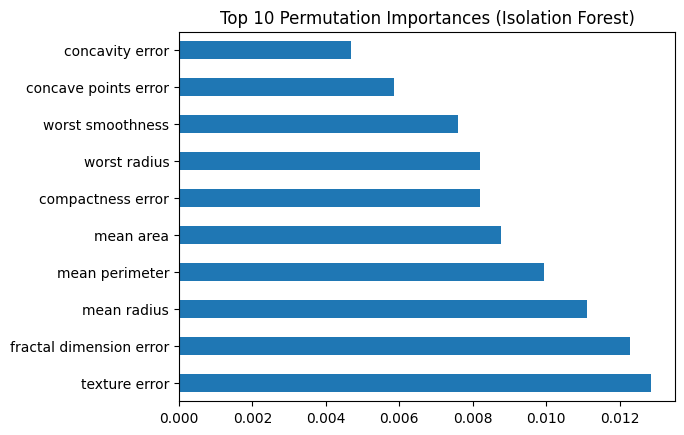

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = IsolationForest(n_estimators=100, random_state=42)
clf.fit(X_train)

# Convert labels for anomaly detection (1 = normal, -1 = anomaly)
y_test_if = pd.Series(y_test).replace({1: -1, 0: 1})

result = permutation_importance(clf, X_test, y_test_if, n_repeats=10, random_state=42, scoring='accuracy')

feat_imp = pd.Series(result.importances_mean, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Permutation Importances (Isolation Forest)")
plt.show()


**Texture error, fractal dimension error, and mean radius are the top contributors to anomaly detection in Isolation Forest, indicating their strong influence on model decisions.**